In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
children_under_5 = pd.read_csv("dataset/datasetFinalTesisCaliCauca.csv")

In [4]:
def plot_distribution(data, label, xxlabel, yylabel, title):
    """
    Generates a bar chart using Matplotlib.

    Parameters:
    data (list or array): Data values for the chart.
    label (str): Label for the data series.
    xlabel (str): Label for the x-axis.
    ylabel (str): Label for the y-axis.
    title (str): Title for the chart.

    Returns:
    None. (The chart is displayed directly.)
    """

    distribution_data = data #distribution_kids_inadequate_sanitary_conditions.values
    category_labels = label # distribution_kids_inadequate_sanitary_conditions.index.to_numpy()

    # Create a bar chart
    plt.figure(figsize=(8, 6))  # Adjust figure size as desired
    plt.bar(category_labels, distribution_data, color='skyblue')
    plt.xlabel(xxlabel)
    plt.ylabel(yylabel)
    plt.title(title)

    # Rotate x-axis labels for better readability if many categories
    plt.xticks(rotation=45, ha='right')  # Optional: Rotate x-axis labels

    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines
    plt.tight_layout()  # Adjust spacing between elements
    plt.show()

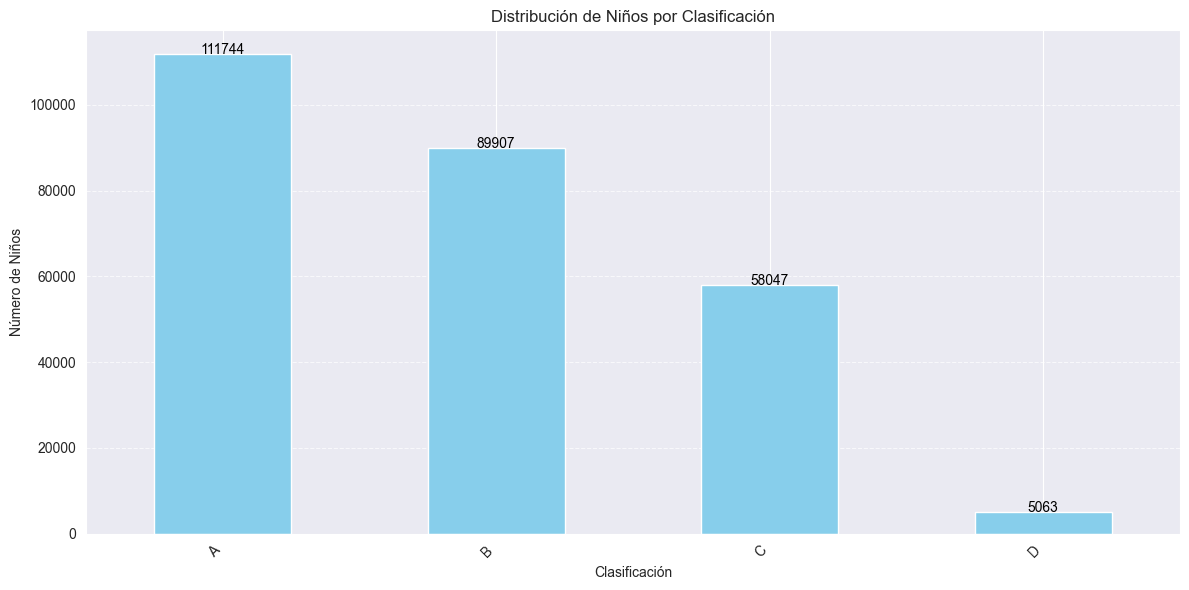

In [5]:

plt.figure(figsize=(12, 6))  # Adjust figure size as desired
children_under_5['clasificacion_letter'].value_counts().plot(kind='bar', color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add labels above each bar
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1, f'{int(p.get_height())}', ha='center', color='black')

# Customize labels and title
plt.xlabel('Clasificación')
plt.ylabel('Número de Niños')
plt.title('Distribución de Niños por Clasificación')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [6]:
###Public Services
no_services = (children_under_5['ind_tiene_energia'] == 2) & \
              (children_under_5['ind_tiene_alcantarillado'] == 2) & \
              (children_under_5['ind_tiene_gas'] == 2) & \
              (children_under_5['ind_tiene_acueducto'] == 2)


children_under_5["no_services"] = no_services
kids_lack_public_services = children_under_5[children_under_5['no_services']]
distribution_lack_services = kids_lack_public_services['clasificacion_letter'].value_counts()


##Dificulties to get water

difficulties_obtaining_water = (children_under_5['ind_agua_llega_7dias'] == 2 )|  (children_under_5['ind_agua_llega_7dias'] == 9)

children_under_5["difficulties_obtaining_water"] = difficulties_obtaining_water
kids_difficulties_obtaining_water = children_under_5[children_under_5['difficulties_obtaining_water']]

distribution_difficulties_obtaining_water= kids_difficulties_obtaining_water['clasificacion_letter'].value_counts()



##Inadequate sanitary conditions

inadequate_sanitary_conditions = (children_under_5['tip_sanitario'].isin([3,4,5])) | \
                                 (children_under_5['tip_ubi_sanitario'] == 2)

children_under_5["inadequate_sanitary_conditions"] = inadequate_sanitary_conditions

kids_inadequate_sanitary_conditions = children_under_5[children_under_5['inadequate_sanitary_conditions']]

distribution_kids_inadequate_sanitary_conditions= kids_inadequate_sanitary_conditions['clasificacion_letter'].value_counts()



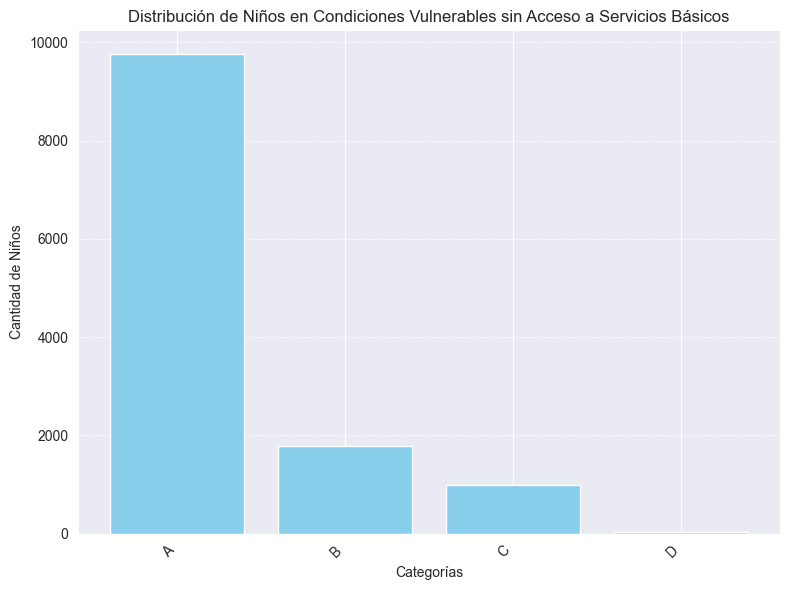

A    9756
B    1785
C     990
D      37
Name: clasificacion_letter, dtype: int64


In [7]:
plot_distribution(distribution_lack_services.values, distribution_lack_services.index.to_numpy(), "Categorías", "Cantidad de Niños", "Distribución de Niños en Condiciones Vulnerables sin Acceso a Servicios Básicos")


print(distribution_lack_services)

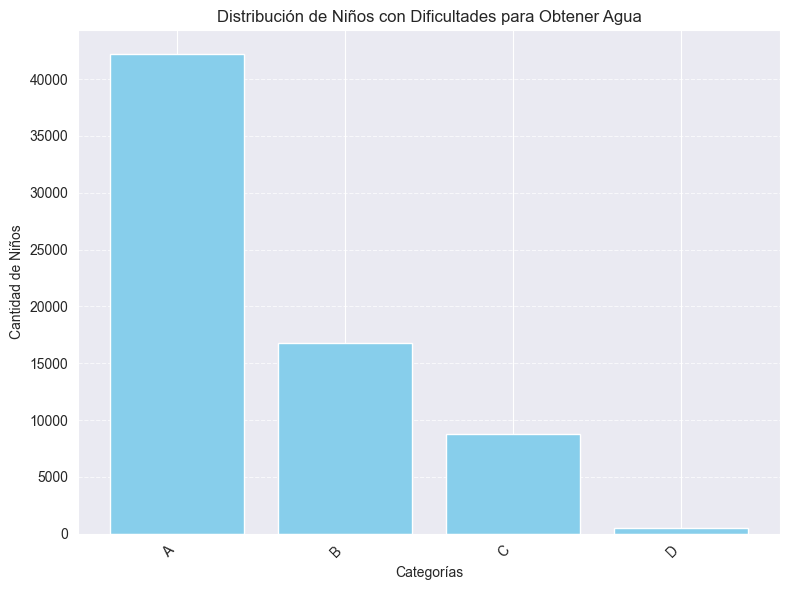

A    42176
B    16772
C     8740
D      534
Name: clasificacion_letter, dtype: int64


In [8]:
plot_distribution(distribution_difficulties_obtaining_water.values, distribution_difficulties_obtaining_water.index.to_numpy(), "Categorías", "Cantidad de Niños", "Distribución de Niños con Dificultades para Obtener Agua")


print(distribution_difficulties_obtaining_water)

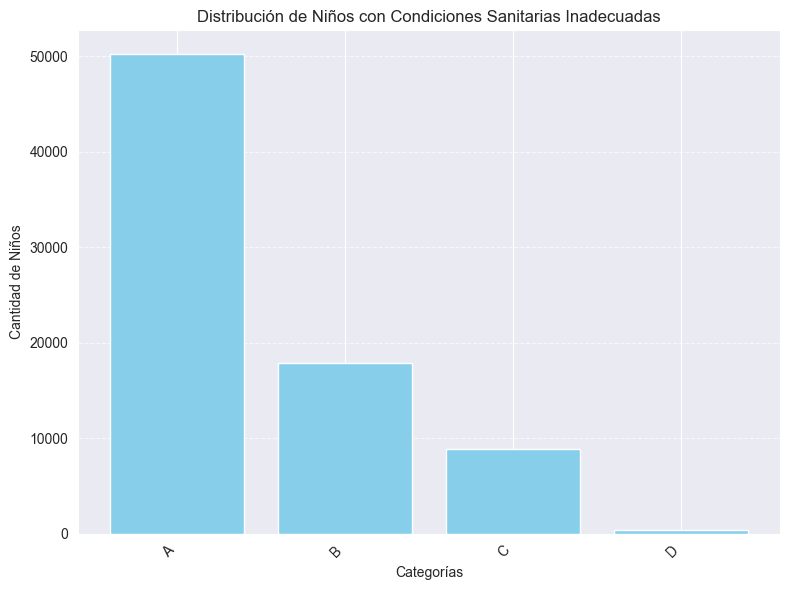

A    50207
B    17884
C     8915
D      335
Name: clasificacion_letter, dtype: int64


In [9]:
plot_distribution(distribution_kids_inadequate_sanitary_conditions.values, distribution_kids_inadequate_sanitary_conditions.index.to_numpy(), "Categorías", "Cantidad de Niños", "Distribución de Niños con Condiciones Sanitarias Inadecuadas")


print(distribution_kids_inadequate_sanitary_conditions)

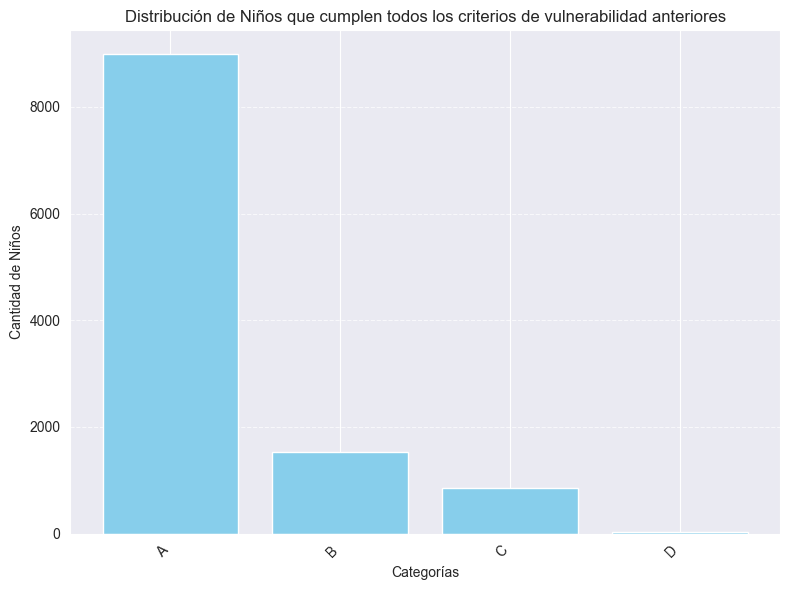

A    8984
B    1523
C     861
D      24
Name: clasificacion_letter, dtype: int64


In [10]:



children_under_5['children_vulnerable'] = np.where(
    (no_services & difficulties_obtaining_water & inadequate_sanitary_conditions),
    True,
    False
)


children_vulnerable_conditions = children_under_5[children_under_5['children_vulnerable']]
distribution_children_vulnerable_conditions = children_vulnerable_conditions['clasificacion_letter'].value_counts()



plot_distribution(distribution_children_vulnerable_conditions.values, distribution_children_vulnerable_conditions.index.to_numpy(), "Categorías", "Cantidad de Niños", "Distribución de Niños que cumplen todos los criterios de vulnerabilidad anteriores")


print(distribution_children_vulnerable_conditions)
